#### Carregando as importações

In [1]:
import import_ipynb
from image_data_generator import *

importing Jupyter notebook from image_data_generator.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_models_DL.ipynb


c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_metrics.ipynb
Found 5121 images belonging to 4 classes.
Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [2]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (2,2), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 50s 304ms/step - loss: 1.0047 - accuracy: 0.5134 - precision: 0.5884 - recall: 0.3224 - f1_score: 0.1770 - val_loss: 1.2207 - val_accuracy: 0.4879 - val_precision: 0.4638 - val_recall: 0.3159 - val_f1_score: 0.2019
Epoch 2/30
161/161 [==============================] - 47s 291ms/step - loss: 0.8018 - accuracy: 0.6331 - precision: 0.6927 - recall: 0.5243 - f1_score: 0.3816 - val_loss: 1.3063 - val_accuracy: 0.3855 - val_precision: 0.4154 - val_recall: 0.3323 - val_f1_score: 0.1605
Epoch 3/30
161/161 [==============================] - 47s 292ms/step - loss: 0.6043 - accuracy: 0.7293 - precision: 0.7645 - recall: 0.6721 - f1_score: 0.5285 - val_loss: 1.5193 - val_accuracy: 0.3784 - val_precision: 0.3951 - val_recall: 0.3253 - val_f1_score: 0.2197
Epoch 4/30
161/161 [==============================] - 47s 290ms/step - loss: 0.3702 - accuracy: 0.8487 - precision: 0.8579 - recall: 0.8334 - f1_score: 0.8250 - val_loss: 1.7574 - val_accuracy:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

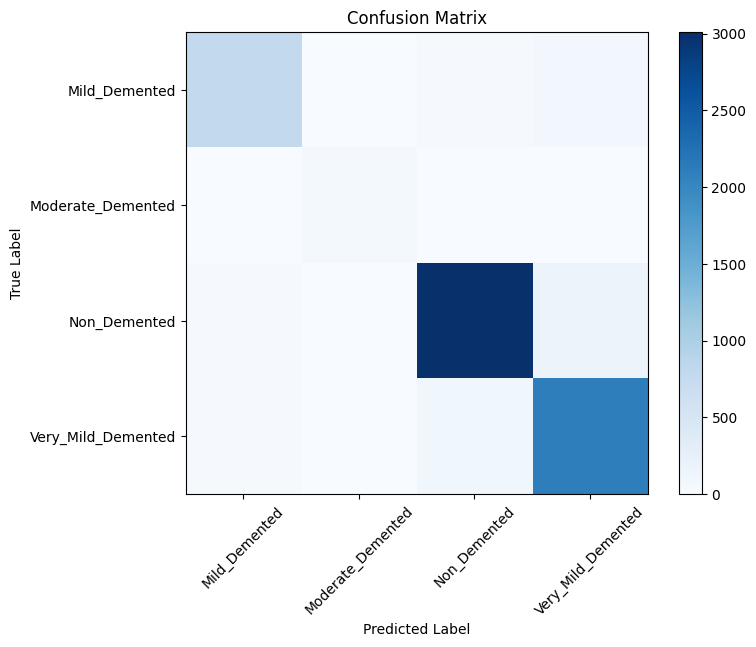

In [3]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [4]:
# Cria modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 62s 380ms/step - loss: 0.9725 - accuracy: 0.5368 - precision: 0.8305 - recall: 0.6744 - f1_score: 0.6974 - val_loss: 1.1346 - val_accuracy: 0.4089 - val_precision: 0.6325 - val_recall: 0.3135 - val_f1_score: 0.1658
Epoch 2/30
161/161 [==============================] - 55s 339ms/step - loss: 0.7897 - accuracy: 0.6462 - precision: 0.7158 - recall: 0.5263 - f1_score: 0.3941 - val_loss: 1.3758 - val_accuracy: 0.4042 - val_precision: 0.4420 - val_recall: 0.3518 - val_f1_score: 0.1992
Epoch 3/30
161/161 [==============================] - 68s 421ms/step - loss: 0.5998 - accuracy: 0.7420 - precision: 0.7797 - recall: 0.6889 - f1_score: 0.5274 - val_loss: 1.6073 - val_accuracy: 0.4167 - val_precision: 0.4357 - val_recall: 0.3917 - val_f1_score: 0.2321
Epoch 4/30
161/161 [==============================] - 65s 406ms/step - loss: 0.3786 - accuracy: 0.8492 - precision: 0.8652 - recall: 0.8256 - f1_score: 0.7520 - val_loss: 1.6027 - val_accuracy:

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

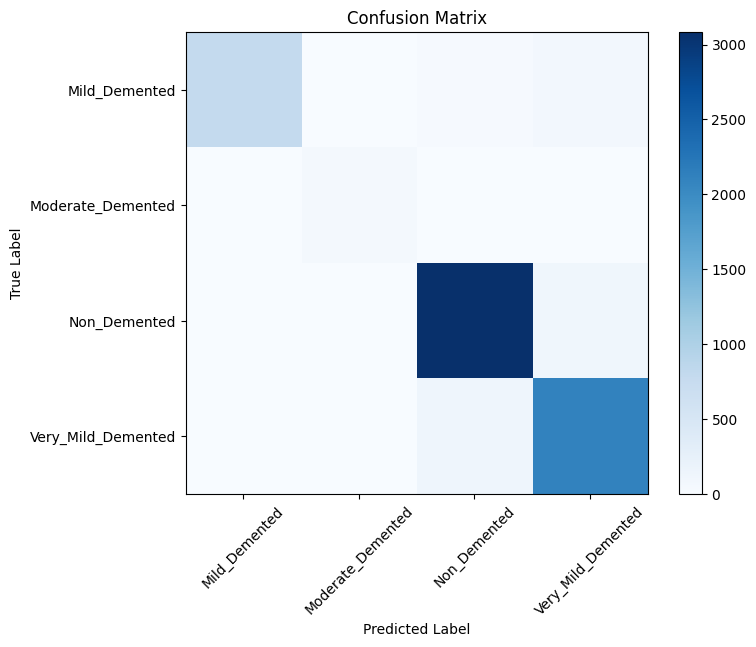

In [5]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [6]:
# Cria modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 83s 508ms/step - loss: 0.9597 - accuracy: 0.5429 - precision: 0.8404 - recall: 0.6770 - f1_score: 0.7058 - val_loss: 1.3525 - val_accuracy: 0.4097 - val_precision: 0.4733 - val_recall: 0.3745 - val_f1_score: 0.1680
Epoch 2/30
161/161 [==============================] - 70s 432ms/step - loss: 0.7627 - accuracy: 0.6458 - precision: 0.7026 - recall: 0.5573 - f1_score: 0.4445 - val_loss: 1.2724 - val_accuracy: 0.4566 - val_precision: 0.4657 - val_recall: 0.3933 - val_f1_score: 0.2097
Epoch 3/30
161/161 [==============================] - 65s 401ms/step - loss: 0.4831 - accuracy: 0.7967 - precision: 0.8175 - recall: 0.7663 - f1_score: 0.7966 - val_loss: 1.5818 - val_accuracy: 0.4527 - val_precision: 0.4618 - val_recall: 0.4253 - val_f1_score: 0.3954
Epoch 4/30
161/161 [==============================] - 61s 379ms/step - loss: 0.2504 - accuracy: 0.9047 - precision: 0.9126 - recall: 0.8967 - f1_score: 0.9252 - val_loss: 1.7229 - val_accuracy:

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)     

200/200 [==============================] - 26s 130ms/step
Classification Report:
                    precision    recall  f1-score   support

     Mild_Demented       0.91      0.89      0.90       896
 Moderate_Demented       1.00      0.91      0.95        64
      Non_Demented       0.95      0.94      0.95      3200
Very_Mild_Demented       0.91      0.93      0.92      2240

          accuracy                           0.93      6400
         macro avg       0.94      0.92      0.93      6400
      weighted avg       0.93      0.93      0.93      6400



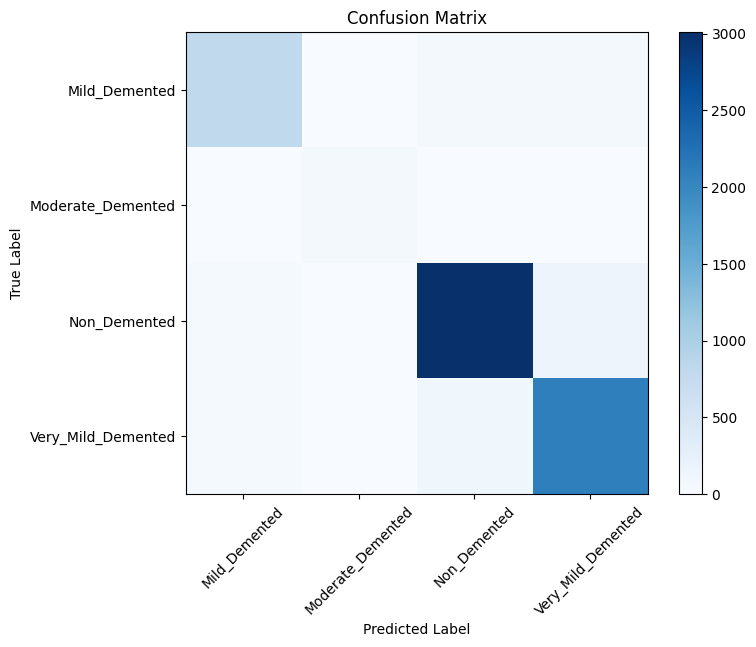

In [7]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [8]:
# Cria modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 75s 446ms/step - loss: 0.9601 - accuracy: 0.5472 - precision: 0.8357 - recall: 0.6769 - f1_score: 0.7038 - val_loss: 1.2992 - val_accuracy: 0.3847 - val_precision: 0.4649 - val_recall: 0.2744 - val_f1_score: 0.1580
Epoch 2/30
161/161 [==============================] - 77s 477ms/step - loss: 0.7714 - accuracy: 0.6528 - precision: 0.7153 - recall: 0.5593 - f1_score: 0.4548 - val_loss: 1.4109 - val_accuracy: 0.3980 - val_precision: 0.4090 - val_recall: 0.3284 - val_f1_score: 0.2114
Epoch 3/30
161/161 [==============================] - 67s 419ms/step - loss: 0.4958 - accuracy: 0.7928 - precision: 0.8171 - recall: 0.7583 - f1_score: 0.7944 - val_loss: 1.5571 - val_accuracy: 0.4715 - val_precision: 0.4774 - val_recall: 0.4300 - val_f1_score: 0.3932
Epoch 4/30
161/161 [==============================] - 67s 416ms/step - loss: 0.2556 - accuracy: 0.9059 - precision: 0.9127 - recall: 0.8959 - f1_score: 0.9194 - val_loss: 1.5120 - val_accuracy:

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 128)     

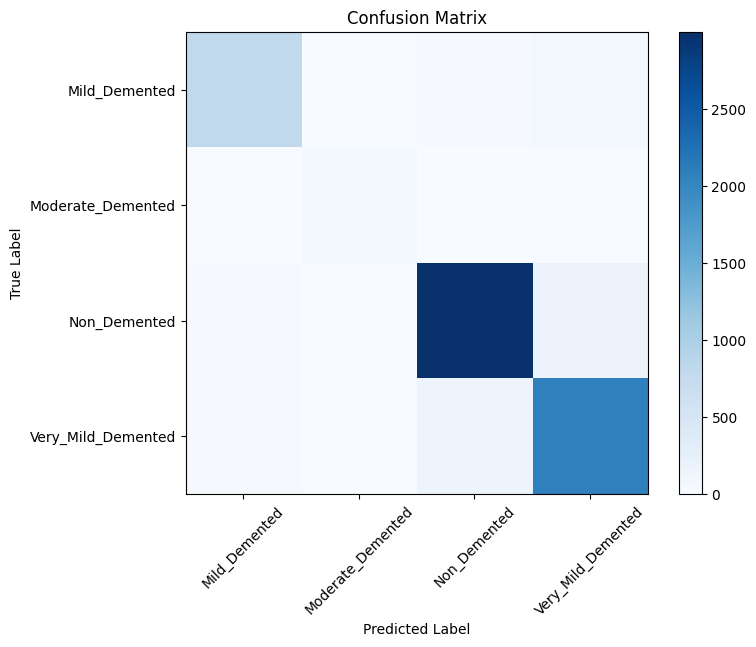

In [9]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [2]:
# Cria modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 244s 2s/step - loss: 0.8632 - accuracy: 0.6399 - precision: 0.7048 - recall: 0.5474 - f1_score: 0.5193 - val_loss: 1.5539 - val_accuracy: 0.4277 - val_precision: 0.4341 - val_recall: 0.3964 - val_f1_score: 0.3331
Epoch 2/30
161/161 [==============================] - 252s 2s/step - loss: 0.1767 - accuracy: 0.9385 - precision: 0.9419 - recall: 0.9344 - f1_score: 0.9545 - val_loss: 1.4183 - val_accuracy: 0.5747 - val_precision: 0.5905 - val_recall: 0.5559 - val_f1_score: 0.5562
Epoch 3/30
161/161 [==============================] - 275s 2s/step - loss: 0.0239 - accuracy: 0.9932 - precision: 0.9934 - recall: 0.9932 - f1_score: 0.9958 - val_loss: 2.1177 - val_accuracy: 0.6310 - val_precision: 0.6336 - val_recall: 0.6286 - val_f1_score: 0.5805
Epoch 4/30
161/161 [==============================] - 277s 2s/step - loss: 0.0072 - accuracy: 0.9980 - precision: 0.9980 - recall: 0.9980 - f1_score: 0.9988 - val_loss: 2.6383 - val_accuracy: 0.5934 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 flatten (Flatten)           (None, 1905152)           0         
                                                                 
 dense (Dense)               (None, 4)                 7620612   
                                                                 
Total params: 7,713,284
Trainable params: 7,713,284
Non-trainable params: 0
_________________________________________________________________
200/200 [==============================] - 89s

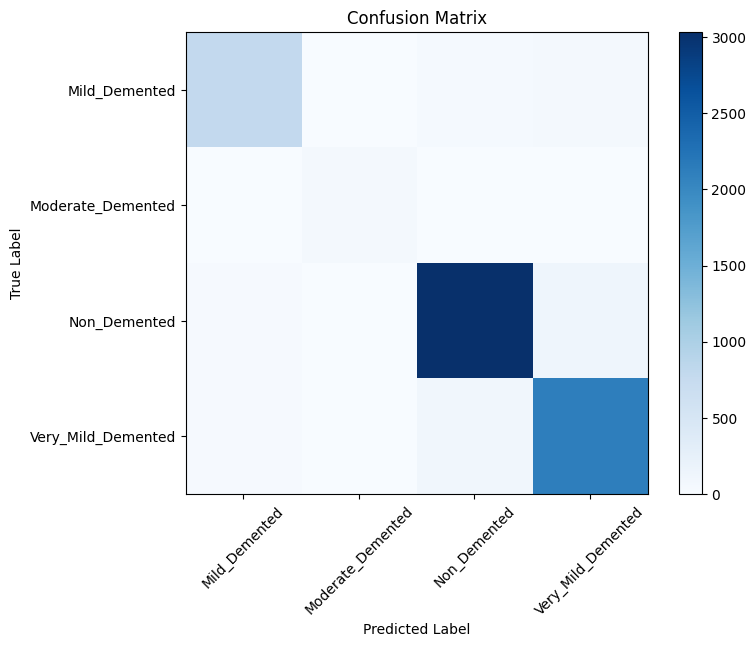

In [3]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [4]:
# Cria modelo
model = Sequential([
    Conv2D(25, (5, 5), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 38s 228ms/step - loss: 0.9725 - accuracy: 0.5304 - precision: 0.8351 - recall: 0.6785 - f1_score: 0.7015 - val_loss: 1.1960 - val_accuracy: 0.3557 - val_precision: 0.5306 - val_recall: 0.2572 - val_f1_score: 0.1567
Epoch 2/30
161/161 [==============================] - 37s 229ms/step - loss: 0.7840 - accuracy: 0.6395 - precision: 0.6973 - recall: 0.5358 - f1_score: 0.3913 - val_loss: 1.1543 - val_accuracy: 0.4949 - val_precision: 0.5190 - val_recall: 0.4058 - val_f1_score: 0.1853
Epoch 3/30
161/161 [==============================] - 36s 223ms/step - loss: 0.5667 - accuracy: 0.7588 - precision: 0.7925 - recall: 0.7069 - f1_score: 0.6385 - val_loss: 1.3669 - val_accuracy: 0.4902 - val_precision: 0.5074 - val_recall: 0.4527 - val_f1_score: 0.3648
Epoch 4/30
161/161 [==============================] - 36s 223ms/step - loss: 0.3175 - accuracy: 0.8774 - precision: 0.8857 - recall: 0.8639 - f1_score: 0.8882 - val_loss: 1.1336 - val_accuracy:

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 124, 124, 25)      650       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 25)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)      

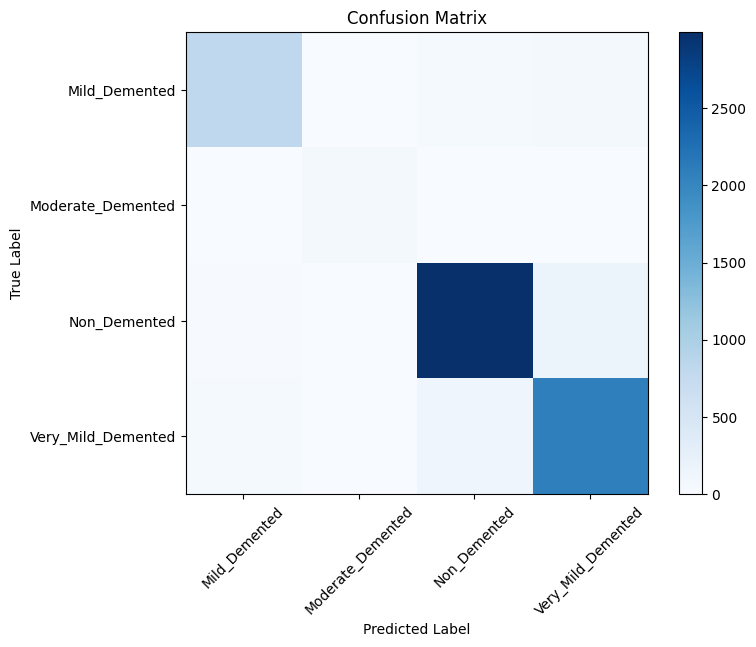

In [5]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [6]:
# Cria modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 61s 371ms/step - loss: 1.0088 - accuracy: 0.5120 - precision: 0.8225 - recall: 0.6545 - f1_score: 0.6942 - val_loss: 1.1729 - val_accuracy: 0.3909 - val_precision: 0.5007 - val_recall: 0.2924 - val_f1_score: 0.1766
Epoch 2/30
161/161 [==============================] - 59s 367ms/step - loss: 0.7822 - accuracy: 0.6391 - precision: 0.7078 - recall: 0.5198 - f1_score: 0.3895 - val_loss: 1.2891 - val_accuracy: 0.3917 - val_precision: 0.4059 - val_recall: 0.3002 - val_f1_score: 0.2012
Epoch 3/30
161/161 [==============================] - 59s 367ms/step - loss: 0.5262 - accuracy: 0.7815 - precision: 0.8149 - recall: 0.7403 - f1_score: 0.6073 - val_loss: 1.3977 - val_accuracy: 0.4676 - val_precision: 0.4779 - val_recall: 0.4386 - val_f1_score: 0.2864
Epoch 4/30
161/161 [==============================] - 60s 373ms/step - loss: 0.2691 - accuracy: 0.9002 - precision: 0.9091 - recall: 0.8864 - f1_score: 0.8360 - val_loss: 1.6343 - val_accuracy:

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

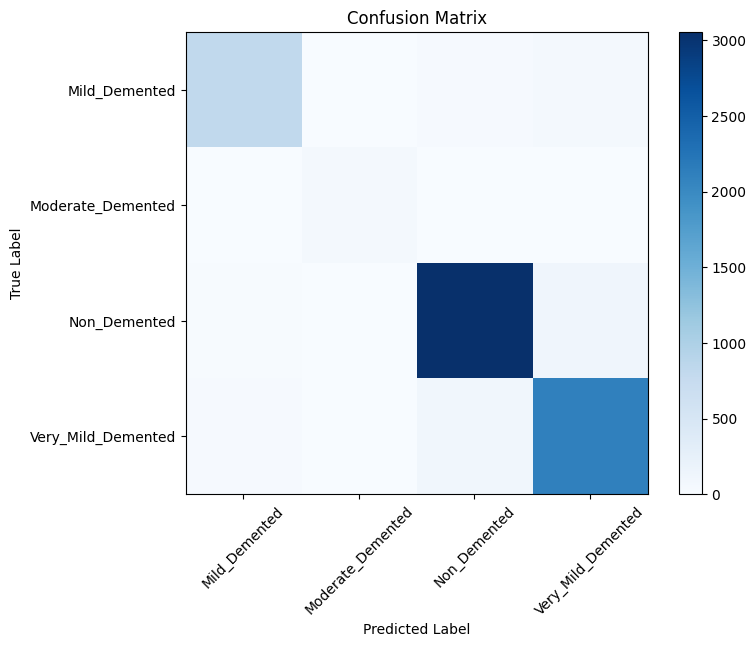

In [7]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [2]:
# Define a arquitetura da CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 46s 282ms/step - loss: 0.9733 - accuracy: 0.5362 - precision: 0.6012 - recall: 0.3509 - f1_score: 0.2169 - val_loss: 1.2620 - val_accuracy: 0.3831 - val_precision: 0.3337 - val_recall: 0.2267 - val_f1_score: 0.1478
Epoch 2/30
161/161 [==============================] - 45s 281ms/step - loss: 0.6908 - accuracy: 0.6903 - precision: 0.7433 - recall: 0.6083 - f1_score: 0.4631 - val_loss: 1.4787 - val_accuracy: 0.4574 - val_precision: 0.4636 - val_recall: 0.4277 - val_f1_score: 0.2646
Epoch 3/30
161/161 [==============================] - 46s 283ms/step - loss: 0.3951 - accuracy: 0.8426 - precision: 0.8597 - recall: 0.8243 - f1_score: 0.8269 - val_loss: 1.2221 - val_accuracy: 0.5481 - val_precision: 0.5607 - val_recall: 0.5160 - val_f1_score: 0.3462
Epoch 4/30
161/161 [==============================] - 46s 286ms/step - loss: 0.1419 - accuracy: 0.9539 - precision: 0.9558 - recall: 0.9508 - f1_score: 0.9633 - val_loss: 1.4534 - val_accuracy:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

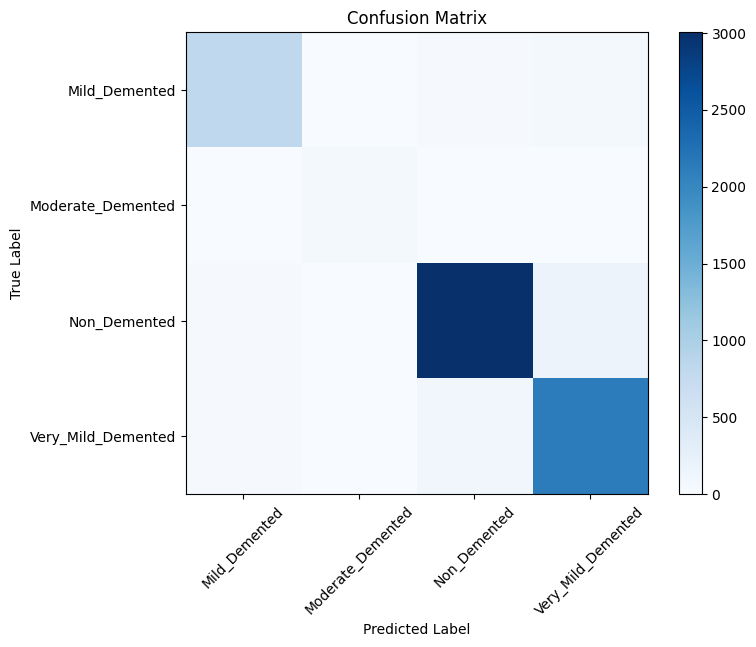

In [3]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [4]:
# Define a arquitetura da CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 61s 372ms/step - loss: 0.9884 - accuracy: 0.5235 - precision: 0.8384 - recall: 0.6567 - f1_score: 0.6956 - val_loss: 1.1092 - val_accuracy: 0.5012 - val_precision: 0.5552 - val_recall: 0.3737 - val_f1_score: 0.1845
Epoch 2/30
161/161 [==============================] - 60s 372ms/step - loss: 0.8031 - accuracy: 0.6260 - precision: 0.7023 - recall: 0.4884 - f1_score: 0.3744 - val_loss: 1.3247 - val_accuracy: 0.4347 - val_precision: 0.4317 - val_recall: 0.3557 - val_f1_score: 0.2184
Epoch 3/30
161/161 [==============================] - 63s 394ms/step - loss: 0.5894 - accuracy: 0.7405 - precision: 0.7751 - recall: 0.6819 - f1_score: 0.5897 - val_loss: 1.5462 - val_accuracy: 0.4144 - val_precision: 0.4147 - val_recall: 0.3878 - val_f1_score: 0.2598
Epoch 4/30
161/161 [==============================] - 64s 396ms/step - loss: 0.4295 - accuracy: 0.8219 - precision: 0.8429 - recall: 0.7944 - f1_score: 0.7014 - val_loss: 1.5098 - val_accuracy:

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

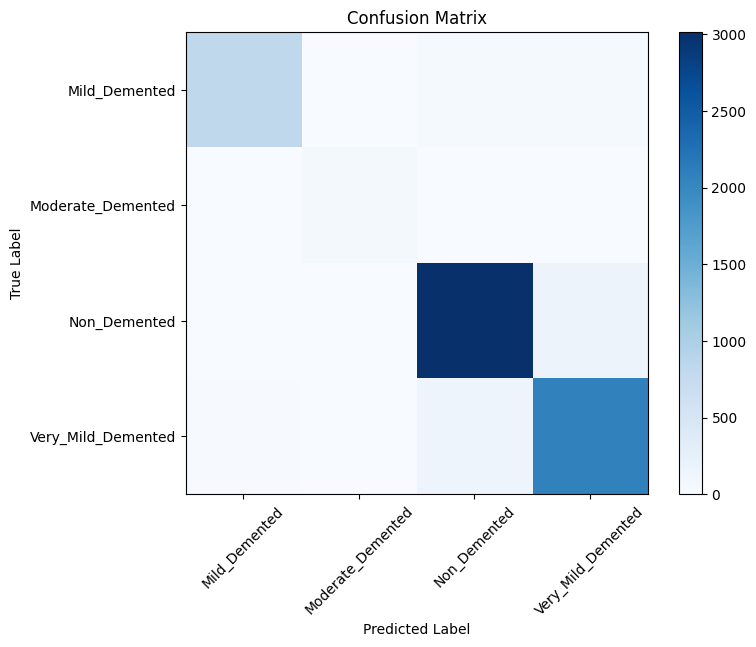

In [5]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [6]:
# Cria modelo AlexNet
model = Sequential([
    Conv2D(32, (11, 11), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (2, 2), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(1024, (2, 2), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(2048, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 86s 530ms/step - loss: 1.0562 - accuracy: 0.4771 - precision: 0.8295 - recall: 0.6109 - f1_score: 0.6809 - val_loss: 1.0594 - val_accuracy: 0.5004 - val_precision: 0.5177 - val_recall: 0.1259 - val_f1_score: 0.0846
Epoch 2/30
161/161 [==============================] - 85s 526ms/step - loss: 1.0447 - accuracy: 0.4999 - precision: 0.5131 - recall: 0.2064 - f1_score: 0.1144 - val_loss: 1.0343 - val_accuracy: 0.5004 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/30
161/161 [==============================] - 85s 530ms/step - loss: 0.9807 - accuracy: 0.5134 - precision: 0.6195 - recall: 0.2804 - f1_score: 0.1492 - val_loss: 1.2094 - val_accuracy: 0.4011 - val_precision: 0.4870 - val_recall: 0.3229 - val_f1_score: 0.1546
Epoch 4/30
161/161 [==============================] - 84s 525ms/step - loss: 0.9004 - accuracy: 0.5616 - precision: 0.6655 - recall: 0.3656 - f1_score: 0.2351 - val_loss: 1.2148 - v

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 118, 118, 32)      3904      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 58, 58, 64)        8256      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       32896     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)     

c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

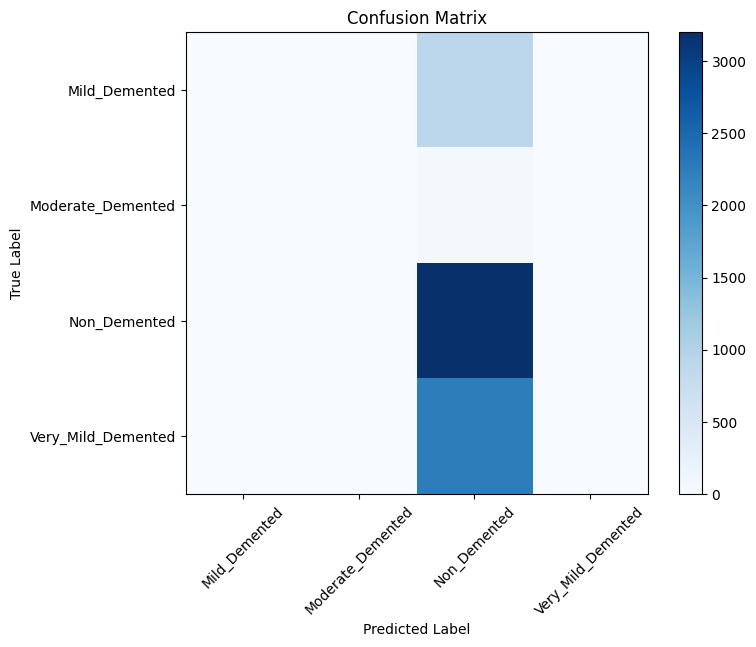

In [7]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [8]:
# Cria modelo LeNet-5
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 45s 271ms/step - loss: 1.0419 - accuracy: 0.4946 - precision: 0.5849 - recall: 0.2451 - f1_score: 0.1403 - val_loss: 1.1048 - val_accuracy: 0.4840 - val_precision: 0.5785 - val_recall: 0.3745 - val_f1_score: 0.1631
Epoch 2/30
161/161 [==============================] - 43s 267ms/step - loss: 0.8703 - accuracy: 0.5913 - precision: 0.6891 - recall: 0.4095 - f1_score: 0.2659 - val_loss: 1.1898 - val_accuracy: 0.4246 - val_precision: 0.5078 - val_recall: 0.2791 - val_f1_score: 0.1655
Epoch 3/30
161/161 [==============================] - 43s 267ms/step - loss: 0.7368 - accuracy: 0.6594 - precision: 0.7442 - recall: 0.5362 - f1_score: 0.4073 - val_loss: 1.2233 - val_accuracy: 0.4097 - val_precision: 0.4652 - val_recall: 0.2768 - val_f1_score: 0.1776
Epoch 4/30
161/161 [==============================] - 43s 267ms/step - loss: 0.5824 - accuracy: 0.7493 - precision: 0.7913 - recall: 0.6673 - f1_score: 0.5170 - val_loss: 1.3960 - val_accuracy:

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 57600)             0         
                                                                 
 dense_7 (Dense)             (None, 128)              

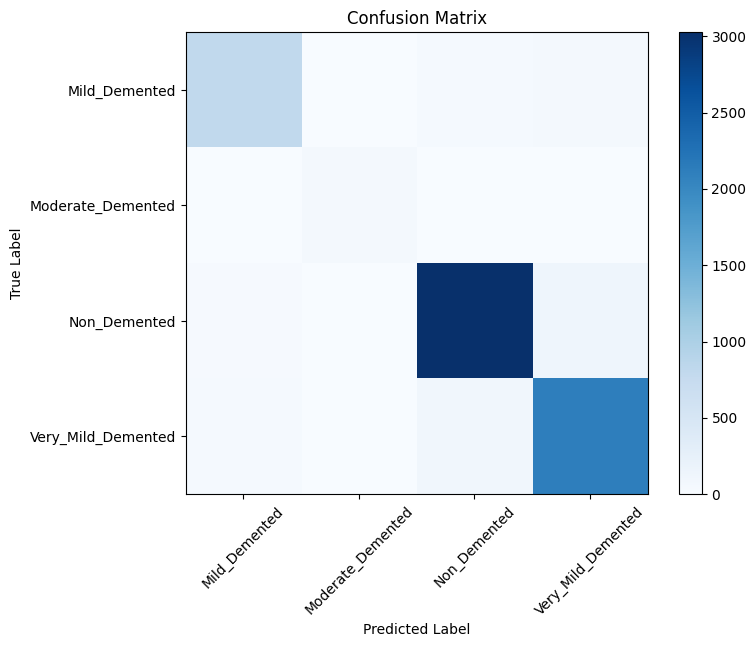

In [9]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
# Cria modelo LeNet-5
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 22s 132ms/step - loss: 0.9641 - accuracy: 0.5259 - precision: 0.8330 - recall: 0.6746 - f1_score: 0.6984 - val_loss: 1.2562 - val_accuracy: 0.4324 - val_precision: 0.4297 - val_recall: 0.3081 - val_f1_score: 0.1752
Epoch 2/30
161/161 [==============================] - 21s 130ms/step - loss: 0.6539 - accuracy: 0.7169 - precision: 0.7592 - recall: 0.6534 - f1_score: 0.4942 - val_loss: 1.3699 - val_accuracy: 0.4058 - val_precision: 0.3865 - val_recall: 0.3260 - val_f1_score: 0.2132
Epoch 3/30
161/161 [==============================] - 21s 130ms/step - loss: 0.3836 - accuracy: 0.8496 - precision: 0.8639 - recall: 0.8307 - f1_score: 0.8312 - val_loss: 1.4961 - val_accuracy: 0.4386 - val_precision: 0.4377 - val_recall: 0.4089 - val_f1_score: 0.4274
Epoch 4/30
161/161 [==============================] - 21s 130ms/step - loss: 0.1866 - accuracy: 0.9270 - precision: 0.9317 - recall: 0.9242 - f1_score: 0.9436 - val_loss: 1.6735 - val_accuracy:

In [11]:
# Cria modelo AlexNet
model = Sequential([
    Conv2D(96, (11, 11), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(3, 3),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(3, 3),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(3, 3),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(4, activation='softmax')
])

# Compila modelo
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = METRICS)

# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = EPOCHS,
    callbacks = [early_stop]
)

# Avaliar o modelo no conjunto de teste
result = model.evaluate(dataset_test)
print('Test:', result)

Epoch 1/30
161/161 [==============================] - 200s 1s/step - loss: 1.0629 - accuracy: 0.4874 - precision: 0.8108 - recall: 0.6246 - f1_score: 0.6822 - val_loss: 1.0469 - val_accuracy: 0.5004 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/30
161/161 [==============================] - 188s 1s/step - loss: 1.0430 - accuracy: 0.4999 - precision: 0.4966 - recall: 0.2425 - f1_score: 0.1227 - val_loss: 1.0387 - val_accuracy: 0.5004 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/30
161/161 [==============================] - 188s 1s/step - loss: 1.0421 - accuracy: 0.4999 - precision: 0.5090 - recall: 0.2255 - f1_score: 0.1196 - val_loss: 1.0370 - val_accuracy: 0.5004 - val_precision: 0.5004 - val_recall: 0.5004 - val_f1_score: 0.1668
Epoch 4/30
161/161 [==============================] - 196s 1s/step - loss: 1.0406 - accuracy: 0.4999 - precision: 0.5027 - recall: 0.2011 - f1_score: 0.1117 - val_loss: 1.0340

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 118, 118, 96)      11712     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 39, 39, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 37, 37, 256)       221440    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 384)       885120    
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 384)        

c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

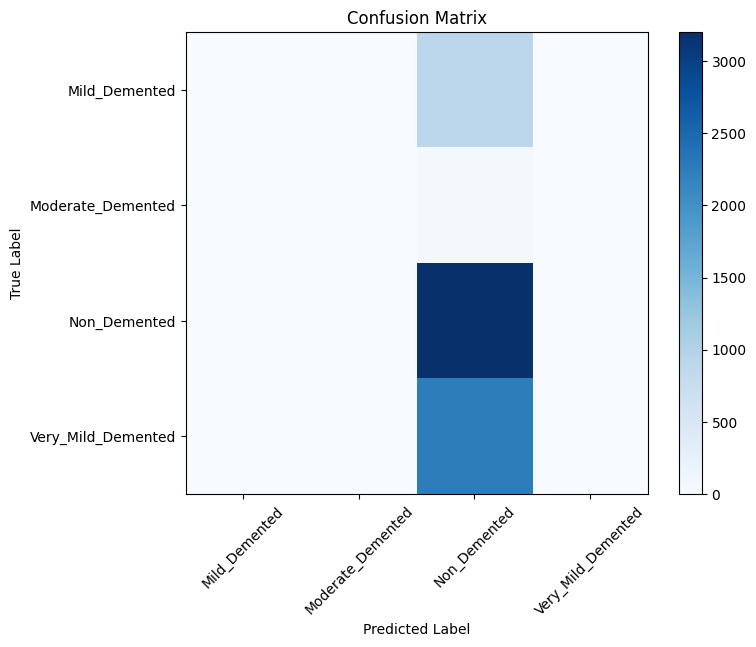

In [12]:
model.summary()

# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [2]:
model = VGG19(weights='imagenet')

574710816/574710816 [==============================] - 31s 0us/step
